## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [5]:
combined_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_results_df = pd.DataFrame(combined_results)
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and
# SEM of the tumor volume for each regimen

summary_statistics_df = pd.DataFrame ({
    "Tumor Volume Mean": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].mean(),1),
    "Tumor Volume Median": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].median(),1),
    "Tumor Volume Variance": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].var(),1),
    "Tumor Volume Population Standard Deviation": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].std(),1),
    "Tumor Volume SEM": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].sem(),1)
    
})

#Formating
th_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#F7F5FB'),
  ('background-color', '#324A5F')
  ]

td_props = [
  ('font-size', '13px'),
    ('text-align', 'center')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


(summary_statistics_df.style
    .set_table_styles(styles))

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Population Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,5,0.3
Ceftamin,52.6,51.8,39.3,6.3,0.5
Infubinol,52.9,51.8,43.1,6.6,0.5
Ketapril,55.2,53.7,68.6,8.3,0.6
Naftisol,54.3,52.5,66.2,8.1,0.6
Placebo,54,52.3,61.2,7.8,0.6
Propriva,52.3,50.9,42.4,6.5,0.5
Ramicane,40.2,40.7,23.5,4.8,0.3
Stelasyn,54.2,52.4,59.5,7.7,0.6


## Bar plots

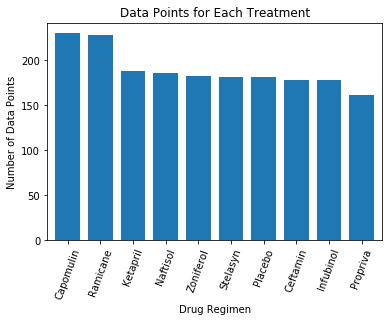

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
(combined_results_df["Drug Regimen"]
     .value_counts()
     .plot(kind="bar",title ="Data Points for Each Treatment", width = .75)
)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 70)
plt.show()

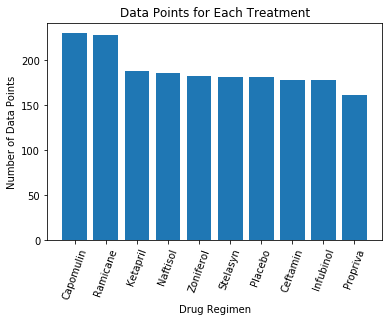

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = combined_results_df["Drug Regimen"].value_counts().index
data_points = combined_results_df["Drug Regimen"].value_counts().tolist()
plt.bar(drug_regimen, data_points)
plt.xticks(rotation = 70)
plt.title("Data Points for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

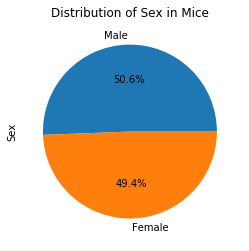

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
(combined_results_df["Sex"]
     .value_counts()
     .plot(kind="pie",title ="Distribution of Sex in Mice", autopct = "%1.1f%%")
)
plt.show()

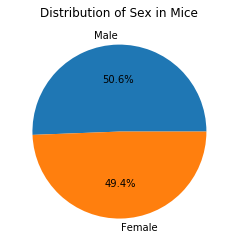

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
number_mice = combined_results_df["Sex"].value_counts().tolist()
plt.pie(number_mice, labels = labels, autopct = "%1.1f%%")
plt.title("Distribution of Sex in Mice")
plt.show()

## Quartiles, outliers and boxplots

In [23]:
final_size_df.groupby('Drug Regimen')['Reduction in Tumor Size (mm3)'].mean().sort_values(ascending = False).head(4)

Drug Regimen
Ramicane      8.8084
Capomulin     8.3324
Propriva    -11.7364
Ceftamin    -12.7532
Name: Reduction in Tumor Size (mm3), dtype: float64

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
final_size_df = pd.DataFrame ({
    "Drug Regimen" : combined_results_df.groupby("Mouse ID")["Drug Regimen"].first(),
    'Initial Tumor Size (mm3)': combined_results_df.groupby('Mouse ID')['Tumor Volume (mm3)'].first(),
    "Final Tumor Size (mm3)" : combined_results_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last(),
    "Reduction in Tumor Size (mm3)": round((combined_results_df.groupby(
        "Mouse ID")["Tumor Volume (mm3)"].first() - 
                        combined_results_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last()),2),
})
# I am considering the four most promising treatments as the ones that cause the greatest reduction in tumor size

top_four = final_size_df.groupby(
    "Drug Regimen")["Reduction in Tumor Size (mm3)"].mean().sort_values(ascending = False).head(4).index

final_size_df = (final_size_df
                 .loc[final_size_df["Drug Regimen"].isin(top_four)]
                 .sort_values(by = "Reduction in Tumor Size (mm3)", ascending = False))

#Formating
(final_size_df
    .style
    .set_table_styles(styles))

,Drug Regimen,Initial Tumor Size (mm3),Final Tumor Size (mm3),Reduction in Tumor Size (mm3)
Mouse ID,,,,
k403,Ramicane,45,22.0501,22.95
s185,Capomulin,45,23.3436,21.66
m601,Capomulin,45,28.431,16.57
x401,Capomulin,45,28.484,16.52
g791,Ramicane,45,29.1285,15.87
s508,Ramicane,45,30.2762,14.72
f966,Capomulin,45,30.486,14.51
m546,Ramicane,45,30.5646,14.44
z578,Ramicane,45,30.6387,14.36


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Ramicane
ramicane = final_size_df["Drug Regimen"] == "Ramicane"
ramicane_final_size_df = final_size_df[ramicane]
selected_regimen = ramicane_final_size_df.iloc[0,0]

quartiles = ramicane_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = upperq-lowerq

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = ramicane_final_size_df.loc[ramicane_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = ramicane_final_size_df.loc[ramicane_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size using Ramicane is: 4.34

The upper quartile of Reduction in Tumor Size using Ramicane  is: 13.44

The interquartile range of Reduction in Tumor Size using Ramicane is: 9.1

The median of Reduction in Tumor Size using Ramicane is: 8.44

Values below -9.31 could be outliers.

There are no outliers

Values above 27.09 could be outliers.

There are no outliers


In [26]:
# Capomulin
capomulin = final_size_df["Drug Regimen"] == "Capomulin"
capomulin_final_size_df = final_size_df[capomulin]
selected_regimen = capomulin_final_size_df.iloc[0,0]

quartiles = capomulin_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = upperq-lowerq

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = capomulin_final_size_df.loc[capomulin_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = capomulin_final_size_df.loc[capomulin_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size using Capomulin is: 4.84

The upper quartile of Reduction in Tumor Size using Capomulin  is: 12.62

The interquartile range of Reduction in Tumor Size using Capomulin is: 7.779999999999999

The median of Reduction in Tumor Size using Capomulin is: 6.87

Values below -6.83 could be outliers.

There are no outliers

Values above 24.29 could be outliers.

There are no outliers


In [30]:
# Propriva
propriva = final_size_df["Drug Regimen"] == "Propriva"
propriva_final_size_df = final_size_df[propriva]
selected_regimen = propriva_final_size_df.iloc[0,0]

quartiles = propriva_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = upperq-lowerq

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = propriva_final_size_df.loc[propriva_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = propriva_final_size_df.loc[propriva_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size using Propriva is: -17.57

The upper quartile of Reduction in Tumor Size using Propriva  is: -4.12

The interquartile range of Reduction in Tumor Size using Propriva is: 13.45

The median of Reduction in Tumor Size using Propriva is: -10.84

Values below -37.74 could be outliers.

There are no outliers

Values above 16.05 could be outliers.

There are no outliers


In [29]:
# Ceftamin
ceftamin = final_size_df["Drug Regimen"] == "Ceftamin"
ceftamin_final_size_df = final_size_df[ceftamin]
selected_regimen = ceftamin_final_size_df.iloc[0,0]

quartiles = ceftamin_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = upperq-lowerq

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = ceftamin_final_size_df.loc[ceftamin_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = ceftamin_final_size_df.loc[ceftamin_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')
          
          
     

The lower quartile of Reduction in Tumor Size using Ceftamin is: -19.3

The upper quartile of Reduction in Tumor Size using Ceftamin  is: -3.72

The interquartile range of Reduction in Tumor Size using Ceftamin is: 15.58

The median of Reduction in Tumor Size using Ceftamin is: -14.85

Values below -42.67 could be outliers.

There are no outliers

Values above 19.65 could be outliers.

There are no outliers


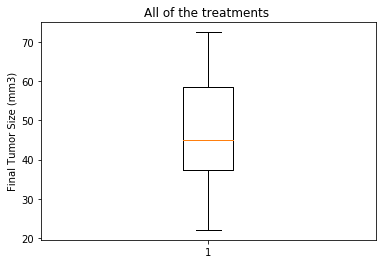

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(final_size_df["Final Tumor Size (mm3)"])
ax1.set_ylabel('Final Tumor Size (mm3)')
plt.title("All of the treatments ")
plt.show()

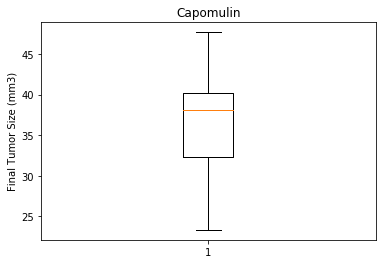

In [33]:
fig1, ax1 = plt.subplots()
ax1.boxplot(capomulin_final_size_df["Final Tumor Size (mm3)"])
ax1.set_ylabel('Final Tumor Size (mm3)')
plt.title("Capomulin")
plt.show()

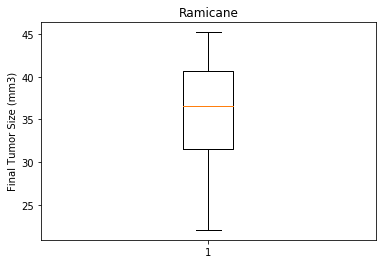

In [32]:
fig1, ax1 = plt.subplots()
ax1.boxplot(ramicane_final_size_df["Final Tumor Size (mm3)"])
ax1.set_ylabel('Final Tumor Size (mm3)')
plt.title("Ramicane")
plt.show()

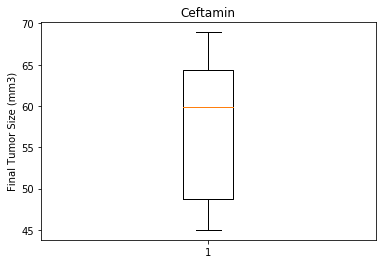

In [34]:
fig1, ax1 = plt.subplots()
ax1.boxplot(ceftamin_final_size_df["Final Tumor Size (mm3)"])
ax1.set_ylabel('Final Tumor Size (mm3)')
plt.title("Ceftamin")
plt.show()

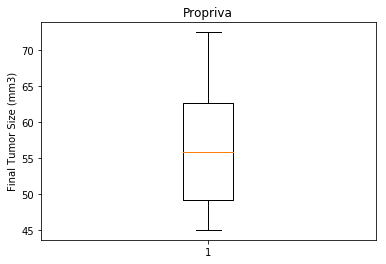

In [35]:
fig1, ax1 = plt.subplots()
ax1.boxplot(propriva_final_size_df["Final Tumor Size (mm3)"])
ax1.set_ylabel('Final Tumor Size (mm3)')
plt.title("Propriva")
plt.show()

## Line and scatter plots

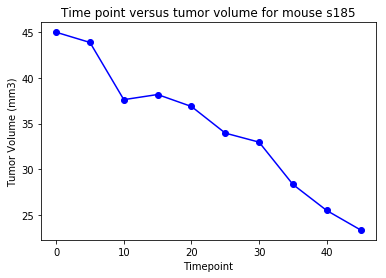

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treated = combined_results_df.loc[combined_results_df["Drug Regimen"] == "Capomulin"]
selected_mouse = capomulin_treated.iloc[0,0]
selected_mouse_results = combined_results_df.loc[combined_results_df["Mouse ID"] == selected_mouse]
x_axis = selected_mouse_results["Timepoint"]
y_axis = selected_mouse_results["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="blue", marker="o")

plt.title(f"Time point versus tumor volume for mouse {selected_mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


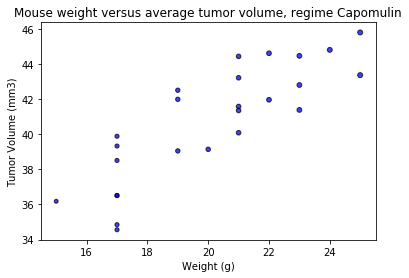

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_treated = combined_results_df.loc[combined_results_df["Drug Regimen"] == "Capomulin"]

x_axis = capomulin_treated.groupby("Mouse ID")["Weight (g)"].first()
y_axis = capomulin_treated.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolors="black", alpha=0.75, s=x_axis)

plt.title(f"Mouse weight versus average tumor volume, regime Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [40]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
weight = capomulin_treated["Weight (g)"]
tumor_size = capomulin_treated["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_size)
print(
    f"The correlation between weight and tumor volume is {round(correlation[0],2)}"
    f", which makes for a moderate correlation")

The correlation between weight and tumor volume is 0.53, which makes for a moderate correlation


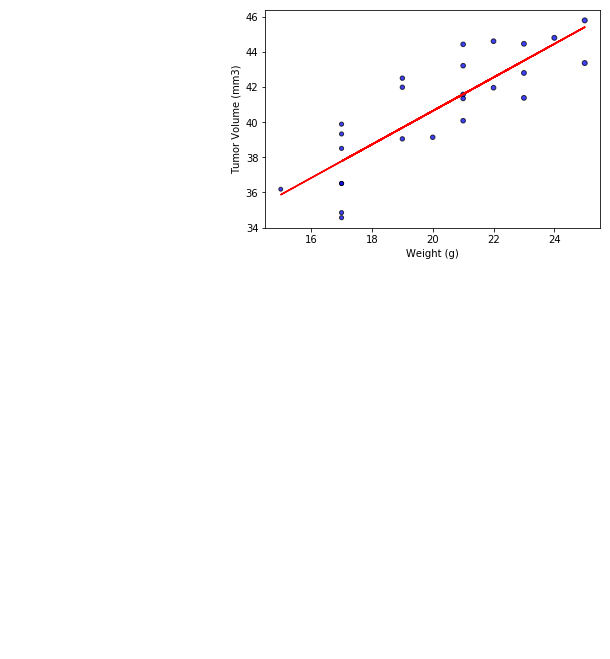

In [41]:
x_axis = capomulin_treated.groupby("Mouse ID")["Weight (g)"].first()
y_axis = capomulin_treated.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolors="black", alpha=0.75, s=x_axis)

plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()